# Project 3: Wrangle and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessment">Data Assessing</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#analysis">Insights and Visualizations</a></li>
</ul>

<a id='intro'></a>
# Introduction

In this project I will be gathering, assessing, cleaning the data coming from the tweet archive of "WeRateDogs", a Twitter account that rates people's dogs with a humorous comment about the dog.

The datasets that will be used are three:
<ol>
    <li>The WeRateDogs Twitter archive, containing information about the tweets (e.g. their text or their timestamp);</li>
    <li>Image predictions data, containing what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network;</li>
    <li>Additional tweets information, namely the number of likes and retweets for each tweet.</li>
</ol>

After the cleaning phase, I will create some visualizations and extract a few insights from the data.

<a id='gathering'></a>
# Data Gathering



Import the libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import json

Load in a pandas dataframe the WeRateDogs Twitter archive. The file was downloaded manually from Udacity resources.

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', index_col='tweet_id')

In [3]:
twitter_archive.head(2)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


Load in a pandas dataframe the "tweet image predictions" datasets, containing the predictions of what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. The file is hosted on Udacity's servers and can be downloaded at the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [5]:
image_predictions = pd.read_csv(url, sep='\t', index_col='tweet_id')

In [6]:
image_predictions.head(2)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


Load in a pandas dataframe the "tweet_json.txt" file, containing information about each tweet (e.g. number of likes, retweets, etc.).

In [7]:
with open('tweet-json.txt') as read_file:
    tweet_info = pd.DataFrame((json.loads(line) for line in read_file), columns = ['id', 'favorite_count', 'retweet_count'])

In [8]:
tweet_info = tweet_info.rename(columns={'id': 'tweet_id', 'favorite_count': 'favorites', 'retweet_count': 'retweets'})
tweet_info.set_index('tweet_id', inplace=True)

In [9]:
tweet_info.head(2)

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514


<a id='assessment'></a>
# Data Assessing



##### Assess the first table "twitter_archive"

In [10]:
twitter_archive.sample(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
676146341966438401,NaN,NaN,2015-12-13 21:07:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bert. He likes flowers. 10/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676146341...,10,10,Bert,None,None,None,None
850380195714523136,NaN,NaN,2017-04-07 16:10:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a personal triathlon coach. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850380195...,13,10,Leo,None,None,None,None
707629649552134146,NaN,NaN,2016-03-09 18:10:30 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We usually don't rate marshmallows but this on...,NaN,NaN,NaN,https://vine.co/v/iHhBOTl5p9z,10,10,None,None,None,None,None
691793053716221953,NaN,NaN,2016-01-26 01:21:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We usually don't rate penguins but this one is...,NaN,NaN,NaN,https://vine.co/v/OTTVAKw6YlW,10,10,None,None,None,None,None
668892474547511297,NaN,NaN,2015-11-23 20:42:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruffles. He is an Albanian Shoop Da Wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668892474...,11,10,Ruffles,None,None,None,None


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

Check for duplicated ids

In [12]:
sum(twitter_archive.index.duplicated())

0

Check denominator ratings.

In [13]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
twitter_archive.loc[twitter_archive['rating_denominator']>10][['text','rating_denominator']]

,text,rating_denominator
tweet_id,,
832088576586297345,@docmisterio account started on 11/15/15,15
820690176645140481,The floofs have been released I repeat the flo...,70
775096608509886464,"RT @dog_rates: After so many requests, this is...",11
758467244762497024,Why does this never happen at my front door......,150
740373189193256964,"After so many requests, this is Bretagne. She ...",11
731156023742988288,Say hello to this unbelievably well behaved sq...,170
722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,20
716439118184652801,This is Bluebert. He just saw that both #Final...,50
713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,90


In [15]:
#Filter rows NOT containing one of the four categories of dogs and check whether the columns contain only "none"
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in dog_stages:
    print(twitter_archive.loc[~twitter_archive['text'].str.contains(stage, case=False)][stage].value_counts())

None    2249
Name: doggo, dtype: int64
None    2346
Name: floofer, dtype: int64
None    2073
Name: pupper, dtype: int64
None    2318
Name: puppo, dtype: int64


In [16]:
#Filter rows containing one of the four categories of dogs and check whether the columns do not contain any "none"
for stage in dog_stages:
    print(twitter_archive.loc[twitter_archive['text'].str.contains(stage, case=False)][stage].value_counts())

doggo    97
None     10
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    257
None       26
Name: pupper, dtype: int64
puppo    30
None      8
Name: puppo, dtype: int64


##### Assess the second table "image_predictions"

In [17]:
image_predictions.sample(5)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
674632714662858753,https://pbs.twimg.com/media/CVzG3yOVAAAqi9I.jpg,1,jellyfish,0.432748,False,goldfish,0.113111,False,coral_reef,0.087047,False
747594051852075008,https://pbs.twimg.com/media/Cl_80k5WkAEbo9m.jpg,1,basenji,0.389136,True,dingo,0.270226,False,Chihuahua,0.098939,True
883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True
790337589677002753,https://pbs.twimg.com/media/CvfX2AnWYAAQTay.jpg,1,Pembroke,0.658808,True,Cardigan,0.153096,True,toy_terrier,0.102299,True
728653952833728512,https://pbs.twimg.com/media/Chyy5lQWUAEzxSL.jpg,2,window_shade,0.594333,False,studio_couch,0.053515,False,rotisserie,0.041248,False


In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


Check for duplicated ids

In [19]:
sum(image_predictions.index.duplicated())

0

##### Assess the third table "tweet_info"

In [20]:
tweet_info.sample(5)

,favorites,retweets
tweet_id,,
672239279297454080,953,347
680798457301471234,3134,1182
741793263812808706,4982,1698
738883359779196928,3661,917
742534281772302336,7744,4011


In [21]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(2)
memory usage: 55.2 KB


Check for duplicated ids

In [22]:
sum(tweet_info.index.duplicated())

0

## Assessing results

#### twitter_archive table
<ul>
    <li>Some of the tweets are either replies or retweets, therefore should be removed.</li>
    <li>Column "timestamp" is an object, should be datetime.</li>
    <li>Some observations have denominators different than 10, I must normalize the data.</li>
    <li>The four columns with "dog stages" are incorrect, they do not include the dog stage if, in the column "text", it is put at the beginning of another word or if it is plural (e.g. doggos).</li>
    <li>Columns "doggo", "floofer", "pupper" and "puppo" should be merged into a single column (dog "stage").</li>
</ul>

#### image_predictions table
<ul>
    <li>There are 2075 observations, "twitter_archive" has 2356.</li>
    <li>Column headers are not informative.</li>
    <li>Multiple predictions are split in different columns.</li>
    <li>The table should be merged with the table "twitter_archive".</li>
</ul>

#### tweet_info table
<ul>
    <li>There are 2354 observations, "twitter_archive" has 2356.</li>
    <li>The table should be merged with the table "twitter_archive".</li>
</ul>

<a id='cleaning'></a>
# Data Cleaning


Create a copy of each dataframe.

In [23]:
twitter_archive_cleaned=twitter_archive.copy()
image_predictions_cleaned=image_predictions.copy()
tweet_info_cleaned=tweet_info.copy()

### twitter_archive

##### Define
Remove replies and retweets.

##### Code

In [24]:
twitter_archive_cleaned = twitter_archive_cleaned.loc[twitter_archive_cleaned['retweeted_status_id'].isnull()]
twitter_archive_cleaned = twitter_archive_cleaned.loc[twitter_archive_cleaned['in_reply_to_status_id'].isnull()]

##### Test

In [25]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 278.

Drop the previous columns, since they are not useful anymore.

In [26]:
twitter_archive_cleaned.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                              'retweeted_status_id', 'retweeted_status_user_id',
                              'retweeted_status_timestamp'], axis=1, inplace=True)

Drop more columns that won't be used in the analysis.

In [27]:
twitter_archive_cleaned.drop(['source', 'expanded_urls', 'name'], axis=1, inplace=True)

##### Define
Convert "timestamp" column to datetime.

##### Code

In [28]:
twitter_archive_cleaned['timestamp'] = pd.to_datetime(twitter_archive_cleaned['timestamp'])

##### Test

In [29]:
twitter_archive_cleaned.dtypes

timestamp             datetime64[ns, UTC]
text                               object
rating_numerator                    int64
rating_denominator                  int64
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

##### Define
Compute the ratio between the rating numerator and denominator, in order to normalize the data.

##### Code

In [30]:
twitter_archive_cleaned['rating']=twitter_archive_cleaned['rating_numerator']/twitter_archive_cleaned['rating_denominator']

##### Test

In [31]:
twitter_archive_cleaned['rating'].value_counts()

1.200000      490
1.000000      438
1.100000      418
1.300000      287
0.900000      153
0.800000       98
0.700000       51
1.400000       38
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
2.700000        1
3.428571        1
0.636364        1
177.600000      1
2.600000        1
42.000000       1
7.500000        1
0.000000        1
0.818182        1
Name: rating, dtype: int64

Check rows with the three outliers (177.6, 42.0 and 7.5 ratings)

In [32]:
with pd.option_context('display.max_colwidth', 400):
    display(twitter_archive_cleaned.loc[twitter_archive_cleaned['rating'].isin([7.5, 42.0, 177.6])])

,timestamp,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,rating
tweet_id,,,,,,,,,
786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10,None,None,None,None,7.5
749981277374128128,2016-07-04 15:00:45+00:00,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10,None,None,None,None,177.6
670842764863651840,2015-11-29 05:52:33+00:00,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10,None,None,None,None,42.0


One was not correctly extracted from the column text, I will correct it manually. The other two are correct, but I decided to remove them as they would affect my calculations.

In [33]:
twitter_archive_cleaned.loc[786709082849828864, 'rating'] = 9.75/10

In [34]:
twitter_archive_cleaned.loc[786709082849828864, 'rating']

0.975

In [35]:
twitter_archive_cleaned.drop(index=749981277374128128, inplace=True)
twitter_archive_cleaned.drop(index=670842764863651840, inplace=True)

Drop the original two columns, as they won't be needed anymore.

In [36]:
twitter_archive_cleaned.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

##### Define
Drop old "dog stages" columns, extract dog stages from the "text" column and create a new individual column called "stage" which includes them.

##### Code

In [37]:
twitter_archive_cleaned.drop(dog_stages, axis=1, inplace=True)

In [38]:
#Create a new column containing the stage name if included in the column "text"
twitter_archive_cleaned['stage'] = 'None'
for stage in dog_stages:
    twitter_archive_cleaned['stage']=np.where(twitter_archive_cleaned['text'].str.contains(stage, case=False), stage, twitter_archive_cleaned['stage'])

##### Test

In [39]:
twitter_archive_cleaned['stage'].value_counts()

None       1721
pupper      255
doggo        79
puppo        30
floofer      10
Name: stage, dtype: int64

### image_predictions

##### Define
Rename headers to be more informative.

##### Code

In [40]:
image_predictions_cleaned = image_predictions_cleaned.rename(columns={'jpg_url': 'img_url', 'p1': 'prediction1',
                                                                      'p1_conf': 'prediction1_confidence',
                                                                      'p1_dog': 'prediction1_isdog', 'p2': 'prediction2',
                                                                      'p2_conf': 'prediction2_confidence',
                                                                      'p2_dog': 'prediction2_isdog', 'p3': 'prediction3',
                                                                      'p3_conf': 'prediction3_confidence',
                                                                      'p3_dog': 'prediction3_isdog',})

##### Test

In [41]:
image_predictions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
img_url                   2075 non-null object
img_num                   2075 non-null int64
prediction1               2075 non-null object
prediction1_confidence    2075 non-null float64
prediction1_isdog         2075 non-null bool
prediction2               2075 non-null object
prediction2_confidence    2075 non-null float64
prediction2_isdog         2075 non-null bool
prediction3               2075 non-null object
prediction3_confidence    2075 non-null float64
prediction3_isdog         2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


##### Define
Create a single column with the predictions. Pick the one with the highest confidence for which the algorithm predicted an actual dog.

##### Code

In [42]:
image_predictions_cleaned['prediction_final'] = np.where(image_predictions_cleaned['prediction1_isdog'], image_predictions_cleaned['prediction1'],
                                                np.where(image_predictions_cleaned['prediction2_isdog'], image_predictions_cleaned['prediction2'],
                                                np.where(image_predictions_cleaned['prediction3_isdog'], image_predictions_cleaned['prediction3'], 'No dog predicted')))

In [43]:
image_predictions_cleaned['confidence_final'] = np.where(image_predictions_cleaned['prediction1_isdog'], image_predictions_cleaned['prediction1_confidence'],
                                                np.where(image_predictions_cleaned['prediction2_isdog'], image_predictions_cleaned['prediction2_confidence'],
                                                np.where(image_predictions_cleaned['prediction3_isdog'], image_predictions_cleaned['prediction3_confidence'], None)))

##### Test

In [44]:
image_predictions_cleaned.sample(10)

,img_url,img_num,prediction1,prediction1_confidence,prediction1_isdog,prediction2,prediction2_confidence,prediction2_isdog,prediction3,prediction3_confidence,prediction3_isdog,prediction_final,confidence_final
tweet_id,,,,,,,,,,,,,
667435689202614272,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,Rottweiler,0.999091
673711475735838725,https://pbs.twimg.com/media/CVmA_osW4AArAU1.jpg,1,Maltese_dog,0.607401,True,toy_poodle,0.143836,True,Sealyham_terrier,0.063907,True,Maltese_dog,0.607401
678021115718029313,https://pbs.twimg.com/media/CWjQm5gXAAA9GkD.jpg,1,miniature_pinscher,0.822048,True,Doberman,0.096085,True,Rottweiler,0.032709,True,miniature_pinscher,0.822048
668955713004314625,https://pbs.twimg.com/media/CUibq3uVAAAup_O.jpg,1,cocker_spaniel,0.367492,True,Lakeland_terrier,0.272621,True,soft-coated_wheaten_terrier,0.067006,True,cocker_spaniel,0.367492
777189768882946048,https://pbs.twimg.com/media/Cskh9nRWYAAUxBP.jpg,2,Chihuahua,0.988412,True,Mexican_hairless,0.004177,True,hog,0.001507,False,Chihuahua,0.988412
671362598324076544,https://pbs.twimg.com/media/CVEouDRXAAEe8mt.jpg,1,tub,0.393616,False,bathtub,0.383522,False,swimming_trunks,0.077301,False,No dog predicted,None
677314812125323265,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,2,Blenheim_spaniel,0.924127,True,Japanese_spaniel,0.054790,True,Chihuahua,0.008204,True,Blenheim_spaniel,0.924127
836989968035819520,https://pbs.twimg.com/media/C52V7PzWcAA_pVv.jpg,1,shopping_cart,0.572422,False,shopping_basket,0.414002,False,toy_poodle,0.005887,True,toy_poodle,0.0058873
675166823650848770,https://pbs.twimg.com/media/CV6spB7XAAIpMyP.jpg,1,llama,0.284394,False,standard_poodle,0.132569,True,teddy,0.127975,False,standard_poodle,0.132569


Drop the old columns that won't be used anymore.

In [45]:
image_predictions_cleaned.drop(['prediction1', 'prediction1_confidence', 'prediction1_isdog', 'prediction2', 
                                'prediction2_confidence', 'prediction2_isdog', 'prediction3', 'prediction3_confidence',
                                'prediction3_isdog', 'img_url'], axis=1, inplace=True)

### All tables

##### Define
Merge all tables together, since we need to combine the data we have for our analyses. As we saw earlier, the image_prediction table contains only 2075 rows, tweet_info 2354 rows and twitter_archive 2356. Therefore, we can use "inner" join to automatically drop the tweets that are missing in at least one of the tables.

##### Code

In [46]:
df_final = pd.merge(image_predictions_cleaned, tweet_info_cleaned, how='inner', left_index=True, right_index=True)
df_final = pd.merge(df_final, twitter_archive_cleaned, how='inner', left_index=True, right_index=True)

##### Test

In [47]:
df_final.sample(5)

,img_num,prediction_final,confidence_final,favorites,retweets,timestamp,text,rating,stage
tweet_id,,,,,,,,,
700518061187723268,1,American_Staffordshire_terrier,0.569501,2887,915,2016-02-19 03:11:35+00:00,This is Vincent. He's the man your girl is wit...,1.0,None
776477788987613185,1,Labrador_retriever,0.884839,9858,3249,2016-09-15 17:48:25+00:00,This is Huck. He's addicted to caffeine. Hope ...,1.1,pupper
666837028449972224,1,No dog predicted,None,857,584,2015-11-18 04:35:11+00:00,My goodness. Very rare dog here. Large. Tail d...,0.3,None
675522403582218240,1,cocker_spaniel,0.299708,1122,316,2015-12-12 03:47:46+00:00,Meet Sammy. He's a Motorola Firefox. Hat under...,1.0,None
790277117346975746,1,Labrador_retriever,0.427742,14081,3732,2016-10-23 19:42:02+00:00,This is Bruce. He never backs down from a chal...,1.1,None


Store the dataframe in a CSV file.

In [48]:
df_final.to_csv('twitter_archive_master.csv')

<a id='analysis'></a>
# Insights and Visualizations

Now I can proceed with analysis and the visualizations of the data. I started by creating univariate visualizations of each variable, to identify trends in their distribution. After that I created bivariate visualizations to identify relationships between these variables.

In [49]:
df_final.describe()

,img_num,favorites,retweets,rating
count,1969.000000,1969.000000,1969.000000,1969.000000
mean,1.202133,8951.310818,2783.673946,1.055845
std,0.559267,12273.776070,4699.921113,0.230161
min,1.000000,81.000000,16.000000,0.000000
25%,1.000000,1985.000000,628.000000,1.000000
50%,1.000000,4144.000000,1367.000000,1.100000
75%,1.000000,11411.000000,3238.000000,1.200000
max,4.000000,132810.000000,79515.000000,3.428571


In [50]:
def make_hist(column, n_bins, x_lim):
    plt.hist(data=df_final, x=column, bins=n_bins)
    plt.xlim((0,x_lim))
    plt.show()

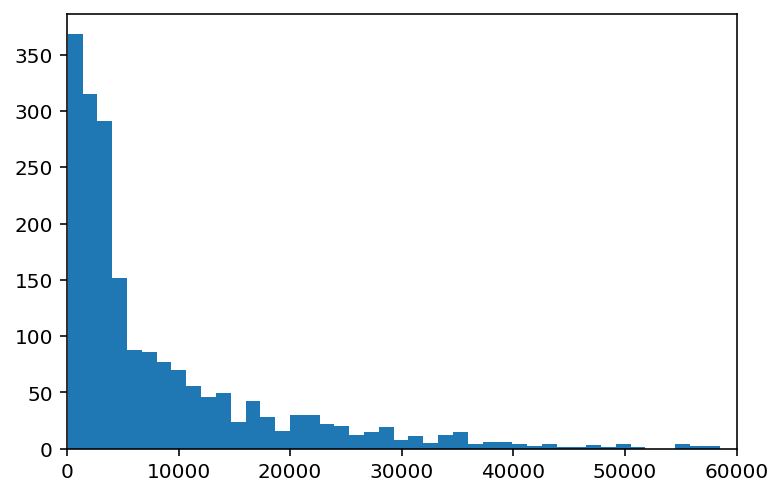

In [51]:
make_hist('favorites', 100, 60000)

The distribution of favorites (likes) is right skewed, there are more tweets with lower values.

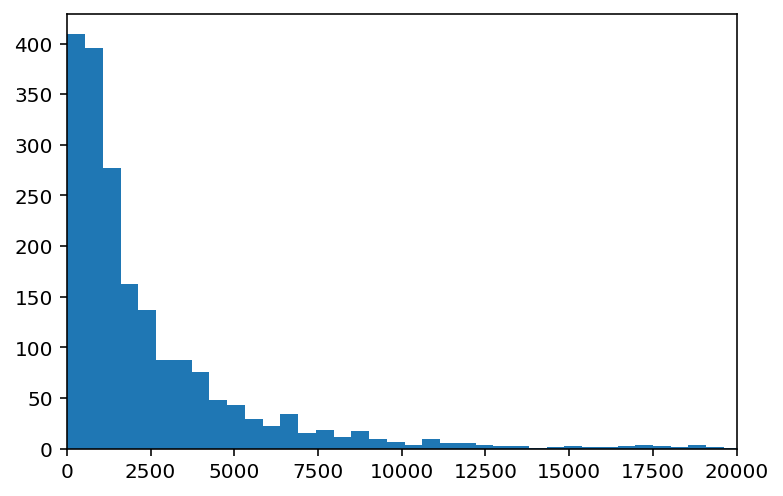

In [52]:
make_hist('retweets', 150, 20000)

The distribution of retweets is also right skewed.

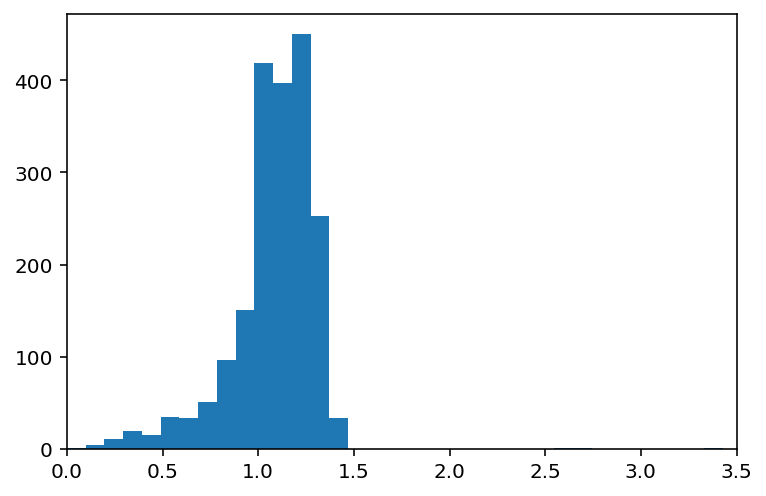

In [53]:
make_hist('rating', 35, 3.5)

The distribution of ratings is left skewed, the majority of the ratings are between 1.0 and 1.5.

In [54]:
def make_scatter(x_column, y_column):
    plt.ylim(0,df_final[y_column].max())
    plt.xlim(0,df_final[x_column].max())
    sns.regplot(data=df_final, x=x_column, y=y_column, x_jitter=0.1, scatter_kws={'alpha': 0.2});

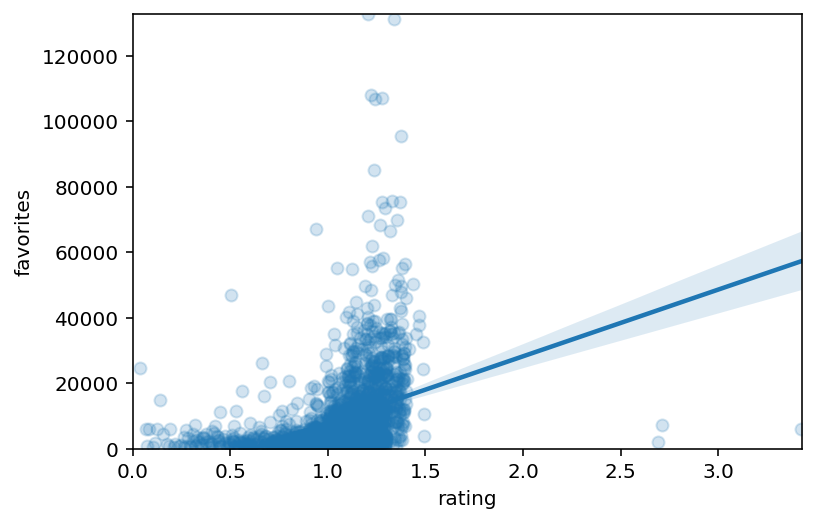

In [55]:
make_scatter('rating', 'favorites')

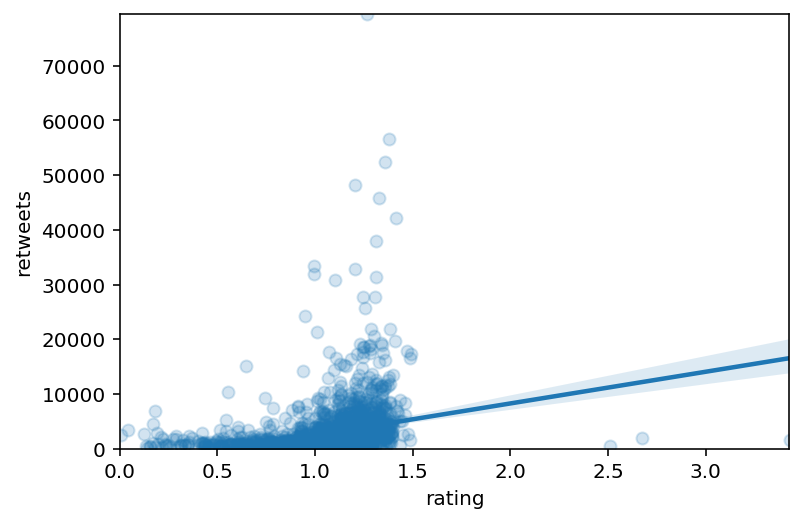

In [56]:
make_scatter('rating', 'retweets')

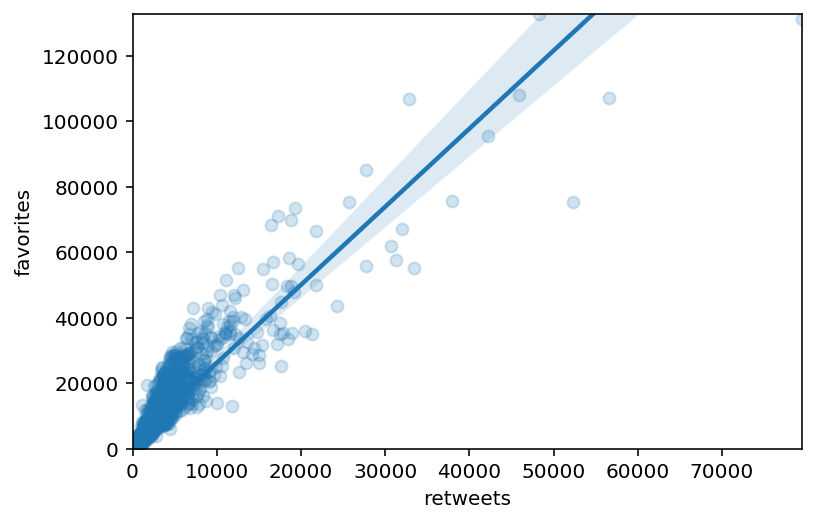

In [57]:
make_scatter('retweets', 'favorites')

As shown in the three scatterplots above, ratings, number of retweets and number of likes are all positively correlated.

In [58]:
df_final[['rating', 'retweets', 'favorites']].corr()

,rating,retweets,favorites
rating,1.000000,0.283717,0.382258
retweets,0.283717,1.000000,0.913071
favorites,0.382258,0.913071,1.000000


The correlation between the number of retweets and the number of likes is extremely high as I expected, since tweets with a high number of retweets obtain a higher number of likes and viceversa.

In [59]:
df_final['prediction_final'].value_counts().head(11)

No dog predicted      303
golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   48
Samoyed                42
Pomeranian             41
malamute               33
Name: prediction_final, dtype: int64

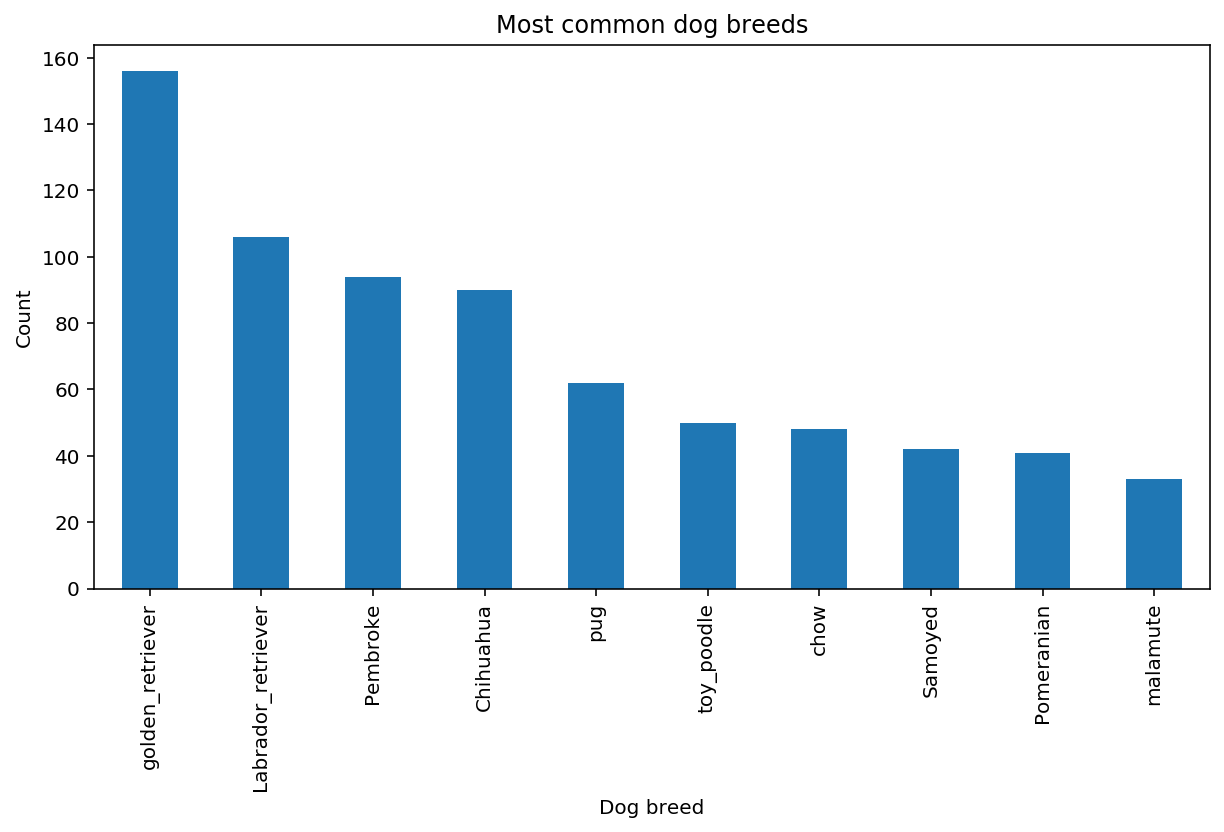

In [60]:
plt.figure(figsize=(10, 5))
df_final['prediction_final'].value_counts().head(11)[1:].plot(kind='bar')
plt.title('Most common dog breeds')
plt.ylabel("Count")
plt.xlabel("Dog breed")
plt.show()

Find the most common dog breeds in the dataset. I excluded the first category since for this one the neural network did not predict a dog.

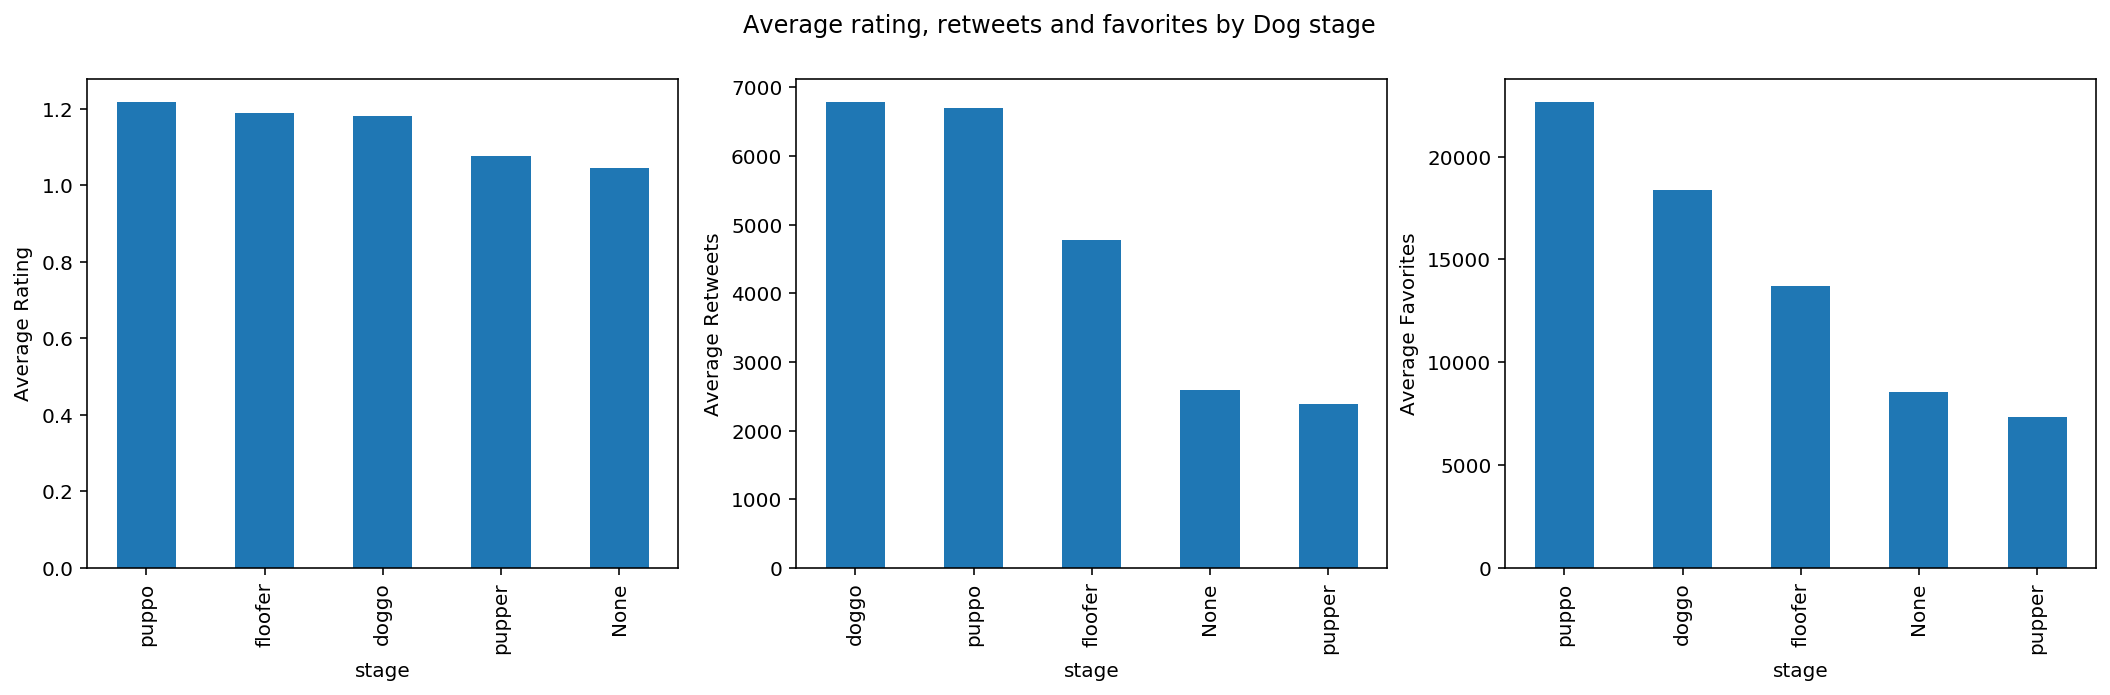

In [61]:
plt.figure(figsize = [18, 4.5])
plt.suptitle('Average rating, retweets and favorites by Dog stage')

plt.subplot(1, 3, 1)
plt.ylabel('Average Rating')
df_final.groupby('stage')['rating'].mean().sort_values(ascending=False).plot(kind='bar')

plt.subplot(1, 3, 2)
plt.ylabel('Average Retweets')
df_final.groupby('stage')['retweets'].mean().sort_values(ascending=False).plot(kind='bar')

plt.subplot(1, 3, 3)
plt.ylabel('Average Favorites')
df_final.groupby('stage')['favorites'].mean().sort_values(ascending=False).plot(kind='bar')

plt.show()

Analyze how the average rating, the number of retweets and likes differ for each category of dog stage:
<ul>
    <li>Rating: no remarked difference across dog stages categories</li>
    <li>Number of retweets: tweets that include the keywords "doggo" and "puppo", on average, are more retweeted</li>
    <li>Number of likes: same as above, tweets containing the keywords "puppo" and "doggo" get, on average, more likes.</li>
</ul>